# Introduction

Big Data Analytics plays a major role in predictive analysis; problem solving and challenges arise in the healthcare field. This research was aimed to build a model to predict if a person is diabetic or not, based on his medical diagnostics. The test was run using data from patients with Pima Indians diabetes.

These problems were mostly handled appropriately by lowering the class average. Normalization of the variables was applied on the data. A detailed analysis of the features was conducted and the most important features were chosen to create the models. Different models like KNN, decision trees and Random forest were built on the data and finally a score of 91% using Random forest algorithm is achieved.

# Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The purpose of the dataset is to predict diagnostically whether a patient has diabetes or not, based on certain diagnostic measures included in the dataset. Several restrictions have been imposed on selecting such instances from a larger database. 

In particular, all patients here are females of Pima Indian descent who are at least 21 years old. The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their Pregnancies, Glucose,BMI, insulin level, Blood Pressure,Skin Thickness,Diabetes pedigree Function and age.

Source : https://www.kaggle.com/uciml/pima-indians-diabetes-database

Library

In [ ]:
import os
path = os.getcwd()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load Dataset

In [ ]:
#Load data
pima = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', 
             header = None, sep = ",",
                        names=['Pregnancy', 'Glucose', 'BloodPressure' ,'SkinfoldThickness', 'Insulin', 'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age', 'Class'])

In [ ]:
pima.head()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
0,6.0,148.0,72.0,35.000000,136.297569,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,89.041117,26.6,0.351,31,0
2,8.0,183.0,64.0,23.404712,107.119497,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
pima.tail(10)

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
758,1.0,106.0,76.0,20.371904,71.691720,37.5,0.197,26,0
759,6.0,190.0,92.0,23.404712,107.119497,35.5,0.278,66,1
760,2.0,88.0,58.0,26.000000,16.000000,28.4,0.766,22,0
761,9.0,170.0,74.0,31.000000,136.297569,44.0,0.403,43,1
762,9.0,89.0,62.0,20.371904,71.691720,22.5,0.142,33,0
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,89.041117,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,23.404712,107.119497,30.1,0.349,47,1
767,1.0,93.0,70.0,31.000000,89.041117,30.4,0.315,23,0


In [ ]:
pima.describe()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.126263,121.691999,72.267826,26.864530,124.771038,32.441053,0.471876,33.240885,0.348958
std,3.202732,30.461151,12.115948,9.508640,91.935806,6.880054,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.371904,71.691720,27.500000,0.243750,24.000000,0.000000
50%,3.324384,117.000000,72.000000,23.404712,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,136.297569,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Information about dataset

In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinfoldThickness         768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BodyMassIndex             768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima.describe()      #describe the numerical values
# no impossible values present

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pima[pima.isnull().any(axis=1)] # Checking for any null values in the dataset

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class


In [ ]:
pima.isnull().values.any() # no null values present

False

# Data Visulation

Visualizing the data is an important step of the data analysis.
With a graphical visualization of the data we have a better understanding of the various features values distribution:
Of course we could restrict our inspection to the representation of the table, but we could overlook important items that could impact the accuracy of our model.

An significant thing I note in the dataset (and that wasn't obvious at the beginning) is the fact that for some of the features some people have null (zero) values: The probability of having 0 as BMI or for blood pressure is not yet realistic.

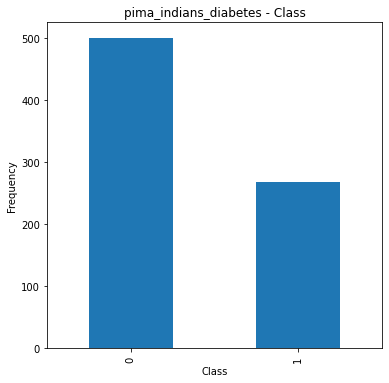

In [ ]:

pima['Class'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('pima_indians_diabetes - Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Relationship between attributes

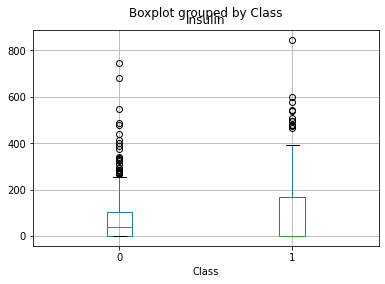

In [ ]:
pima.boxplot(column='Insulin',by='Class')
plt.show()

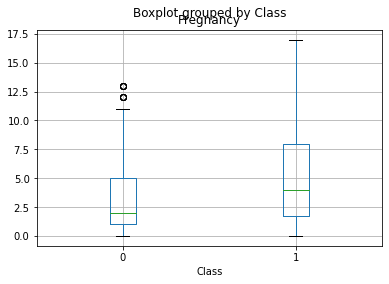

In [ ]:
pima.boxplot(column='Pregnancy',by='Class')
plt.show()

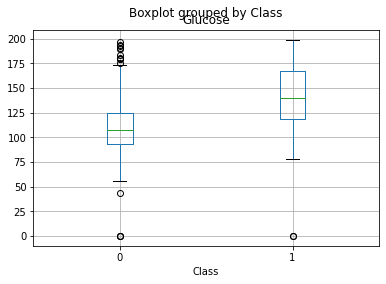

In [ ]:
pima.boxplot(column='Glucose',by='Class')
plt.show()

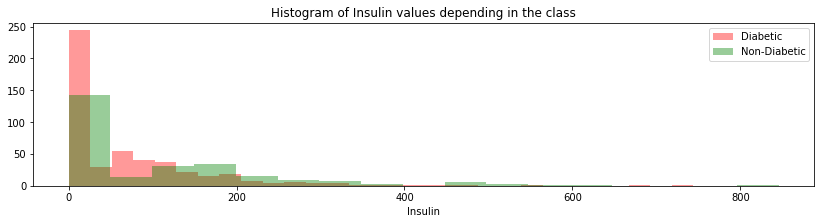

In [ ]:
plt.figure(figsize=(14,3))
Insulin_plt = pima.groupby(pima['Insulin']).Class.count().reset_index()
sns.distplot(pima[pima.Class == 0]['Insulin'], color='red', kde=False, label='Diabetic')
sns.distplot(pima[pima.Class == 1]['Insulin'], color='green', kde=False, label='Non-Diabetic')
plt.legend()
plt.title('Histogram of Insulin values depending in the class')
plt.show()

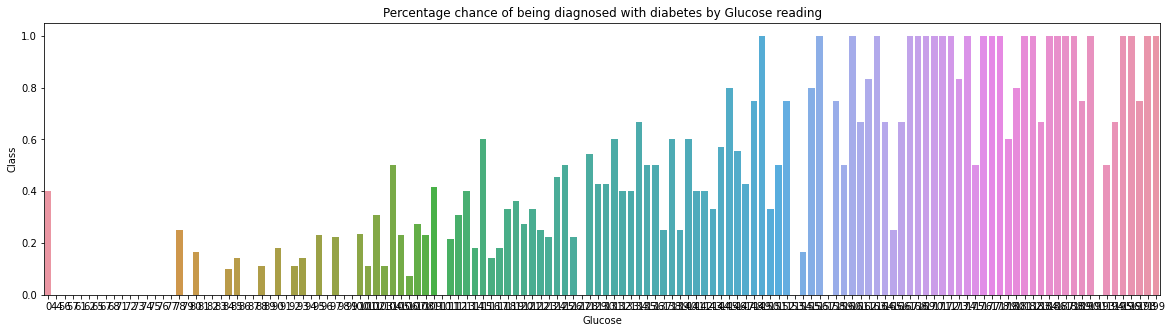

In [ ]:

plt.figure(figsize=(20,5))
glucose_plt = pima.groupby('Glucose').Class.mean().reset_index()
sns.barplot(glucose_plt.Glucose, glucose_plt.Class)
plt.title('Percentage chance of being diagnosed with diabetes by Glucose reading')
plt.show()

Corraletion

In [ ]:
corr_matrix = pima.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class                       1.000000
Glucose                     0.466581
BodyMassIndex               0.292695
Age                         0.238356
Pregnancy                   0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinfoldThickness           0.074752
BloodPressure               0.065068
Name: Class, dtype: float64

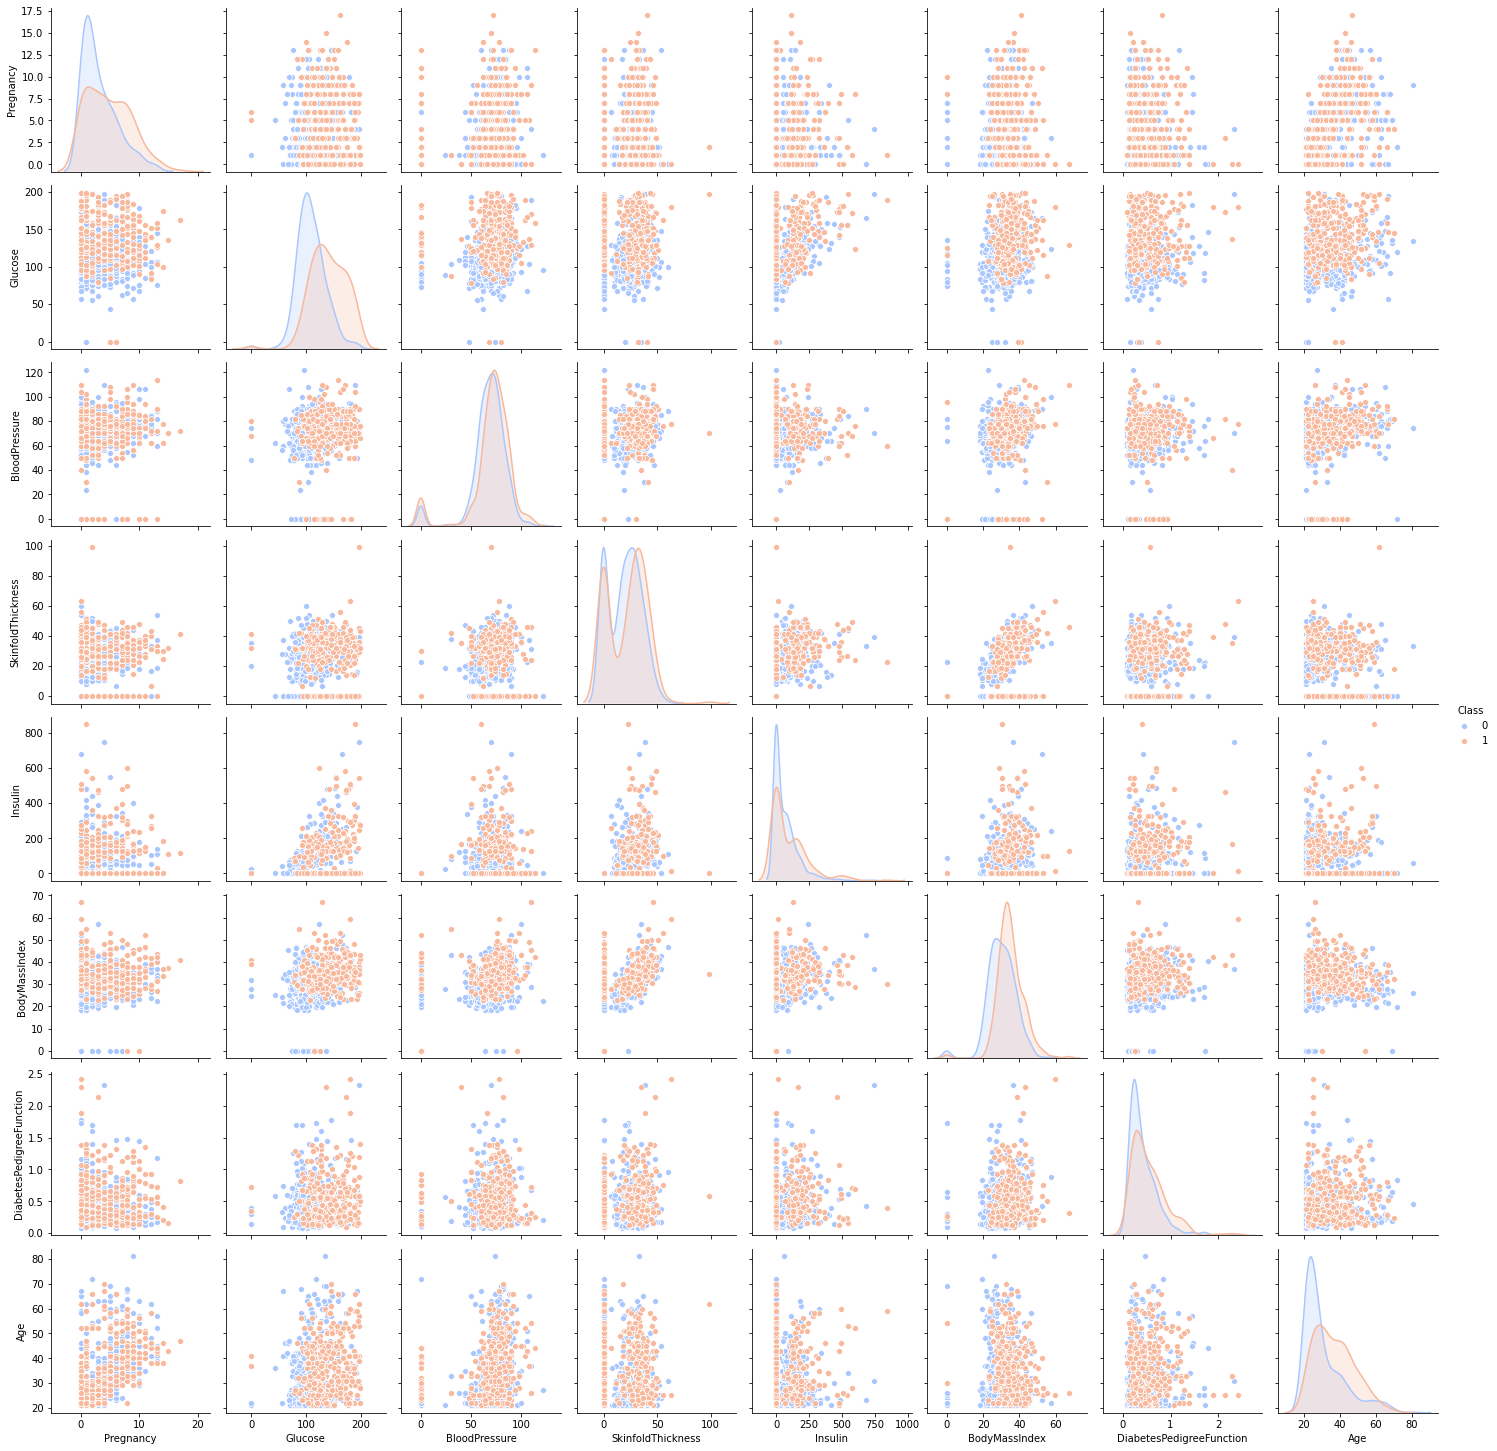

In [ ]:
import seaborn as sns
sns.pairplot(pima,hue='Class',palette='coolwarm')


# Data Cleaning

We have found that some patients lack data for some of the apps. When the data are lacking, machine learning algorithms don't work very well so we need to find a way to "clean" the data we have. The best alternative would be to exclude all those patients with null values, but we will lose loads of valuable data in this way.

Another method is to determine a median value for a given column and replace that value anywhere (in the same column) we have zero or null. Let's see how the second approach can be implemented.

In [ ]:
# Check for zero values in Glucose
print("Number of missing values : " + repr(pima[pima.Glucose == 0].shape[0]))
print(pima[pima.Glucose == 0].groupby('Class')['Class'].count())

Number of missing values : 5
Class
0    3
1    2
Name: Class, dtype: int64


In [ ]:
# Replace zero value with the mean value of the classes
Glucose_0 = pima[(pima['Glucose']== 0)]
pima[(pima['Glucose']== 0) & (pima['Class'] == 0)] = Glucose_0[Glucose_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['Glucose']== 0) & (pima['Class'] == 1)] = Glucose_0[Glucose_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [ ]:

# Check for zero values BloodPressure
print("Number of missing values : " + repr(pima[pima.BloodPressure == 0].shape[0]))
print(pima[pima.BloodPressure == 0].groupby('Class')['Class'].count())

Number of missing values : 35
Class
0    19
1    16
Name: Class, dtype: int64


In [ ]:
# Replace zero value with the mean value of the classes
BloodPressure_0 = pima[(pima['BloodPressure']== 0)]
pima[(pima['BloodPressure']== 0) & (pima['Class'] == 0)] = BloodPressure_0[BloodPressure_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['BloodPressure']== 0) & (pima['Class'] == 1)] = BloodPressure_0[BloodPressure_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [ ]:
# Check for zero values SkinfoldThickness
print("Number of missing values : " + repr(pima[pima.SkinfoldThickness == 0].shape[0]))
print(pima[pima.SkinfoldThickness == 0].groupby('Class')['Class'].count())

Number of missing values : 194
Class
0    121
1     73
Name: Class, dtype: int64


In [ ]:

# Replace zero value with the mean value of the classes
SkinfoldThickness_0 = pima[(pima['SkinfoldThickness']== 0)]
pima[(pima['SkinfoldThickness']== 0) & (pima['Class'] == 0)] = SkinfoldThickness_0[SkinfoldThickness_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['SkinfoldThickness']== 0) & (pima['Class'] == 1)] = SkinfoldThickness_0[SkinfoldThickness_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [ ]:

# Check for zero values Insulin
print("Number of missing values : " + repr(pima[pima.Insulin == 0].shape[0]))
print(pima[pima.Insulin == 0].groupby('Class')['Class'].count())

Number of missing values : 141
Class
0    94
1    47
Name: Class, dtype: int64


In [ ]:
# Replace zero value with the mean value of the classes
Insulin_0 = pima[(pima['Insulin']== 0)]
pima[(pima['Insulin']== 0) & (pima['Class'] == 0)] = Insulin_0[Insulin_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['Insulin']== 0) & (pima['Class'] == 1)] = Insulin_0[Insulin_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [ ]:
# Check for zero values
print("Number of missing values : " + repr(pima[pima.BodyMassIndex == 0].shape[0]))
print(pima[pima.BodyMassIndex == 0].groupby('Class')['Class'].count())

Number of missing values : 1
Class
0    1
Name: Class, dtype: int64


In [ ]:
# Replace zero value with the mean value of the classes
BodyMassIndex_0 = pima[(pima['BodyMassIndex']== 0)] 
pima[(pima['BodyMassIndex']== 0) & (pima['Class'] == 0)] = BodyMassIndex_0[BodyMassIndex_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['BodyMassIndex']== 0) & (pima['Class'] == 1)] = BodyMassIndex_0[BodyMassIndex_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [ ]:
pima.describe()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.126263,121.691999,72.267826,26.864530,124.771038,32.441053,0.471876,33.240885,0.348958
std,3.202732,30.461151,12.115948,9.508640,91.935806,6.880054,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.371904,71.691720,27.500000,0.243750,24.000000,0.000000
50%,3.324384,117.000000,72.000000,23.404712,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,136.297569,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancy                      AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinfoldThickness              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BodyMassIndex               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

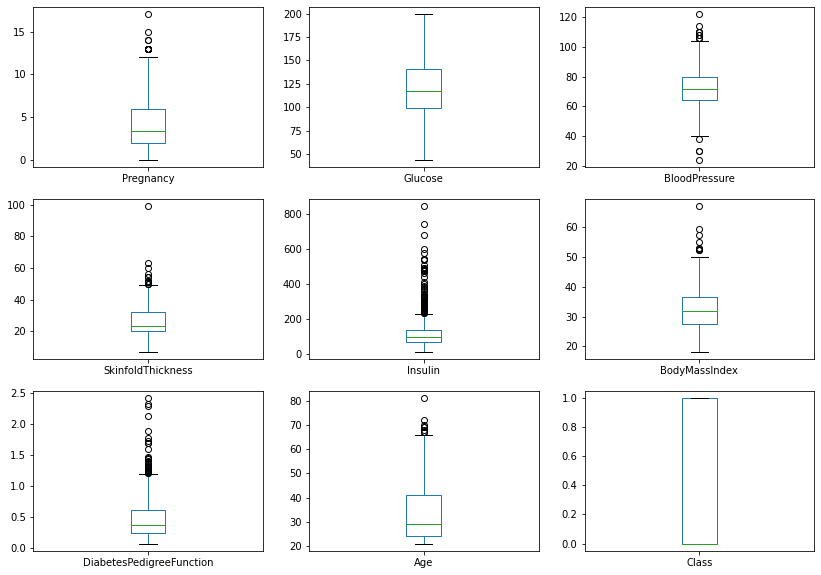

In [ ]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(14,10))

# Data Modelling

Feature Scaling:-One of the most important data transformations we need to apply is the features scaling. It's what makes one special dataset. An outstanding innovative thing is to get insight by making relationships between apps.Most of the machine learning algorithms essentially don't work very well if the functions have different values. For example, in our case the age ranges from 20 to 80 years, while the number of pregnant times a patient has been ranges from 0 to 17.

Spiliting the Data:-The famous rule of dividing the data is to train and test sets of 80–20 per cent respectively. Often, the 20 percent should be designed for the test set in such a way that they are not only randomly cut from the dataset. The data sample used to provide an objective evaluation of a final fit model on the training dataset. We split our data into three parts; Training samples(800  samples are used to train the model),Validation samples(: these samples are held out from the training data and are used to make decisions on how to improve the model.) and Testing samples(200 samples are held out from all decisions and are used to measure the generalized performance of the model)

Make a Prediction:-In our model we create a new person having the three most correlated values high and we scale those values like the others.After,we predict(A value of  1 means that this person is likely to have type 2 diabetic)

In [ ]:
pima.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [ ]:

#data = pima.copy().iloc[:, 0:8].values
#target = pima.copy().iloc[:, 8:9].Class.values
# Oversampling data is given with a subscript of 'o'
np.random.seed(75)
from imblearn.over_sampling import SMOTE, ADASYN
data_o, target_o = SMOTE().fit_sample(pima, pima.Class)


In [ ]:
data_o.shape

(1000, 9)

In [ ]:
target_o.shape

(1000,)

In [ ]:
import collections
collections.Counter(target_o)

Counter({0: 500, 1: 500})

In [ ]:
from sklearn.model_selection import train_test_split
Xo_train, Xo_test, yo_train, yo_test = train_test_split(data_o, target_o, test_size=0.20, random_state=4)

In [ ]:
Xo_train.shape

(800, 9)

In [ ]:
Xo_test.shape

(200, 9)

In [ ]:
yo_train.shape

(800,)

In [ ]:
yo_test.shape

(200,)

In [ ]:
#data = independent variable , target = Dependent variable

data=pima[pima.columns[:8]]
target=pima['Class']

In [ ]:
# Feature scaling using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = data.iloc[:, 0:8].columns
data[cols] = scaler.fit_transform(data)
data.head()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.146992,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.090194,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.178312,0.111922,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [ ]:
data[cols] = preprocessing.scale(data)

In [ ]:

train,test=train_test_split(pima,test_size=0.20,random_state=437,stratify=pima['Class'])# stratify the outcome

X_train=train[train.columns[:8]]
X_test=test[test.columns[:8]]
y_train=train['Class']
y_test=test['Class']

# Algorithms
we selected three algorithms to test k nearest neighbors,dicision tree and random forest which are common algorithms in Machine learning . For an algorithms the default parameters are never the best for our dataset.


#K-Nearest Neighbours Classifier

K-nearest neighbor is also a classification algorithm. It's known as a "lazy learner," since the process's training period is very minimal in the name node and information of the request is stored in the data node. The learning process consists of the data to be processed in the training package. This categorization algorithm allows the data to be classified multivalve. Additionally, noisy data regarding preparation tends to distort classifications. K-nearest neighbors are always selected, as the tests are easy to use, easy to practice, and easy to interpret. This is also used when you're trying to locate related objects in search applications.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(Xo_train, yo_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(Xo_test)

In [ ]:
pred.shape

(200,)

In [ ]:
pred = knn.predict(Xo_test)
print("Accuracy for KNeighborsclassifier is",metrics.accuracy_score(pred,yo_test))

Accuracy for KNeighborsclassifier is 0.845


In [ ]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(yo_test,pred))

[[81 22]
 [ 9 88]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import classification_report

print (classification_report(yo_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       103
           1       0.80      0.91      0.85        97

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



In [ ]:
from sklearn import preprocessing
data_on = preprocessing.scale(data_o)
Xon_train, Xon_test, yon_train, yon_test = train_test_split(data_on, target_o, test_size=0.20, random_state=4)

In [ ]:

knn.fit(Xon_train, yon_train)
pred = knn.predict(Xon_test)

print (confusion_matrix(yon_test,pred))

[[102   1]
 [  0  97]]


In [ ]:
# Confusion Matrix
print (classification_report(yon_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.99      1.00      0.99        97

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



#Decision Tree

Decision Tree algorithm is part of the supervised learning algorithms family. Decision tree  is a category of tree classifier. In general, the decision tree uses information entropy, information gain or Gini coefficients to determine which characteristic to use as a non-leaf-node classification function. The decision tree shows Decision Points, defined by squares, are the alternative acts that can be performed for exploration along with the investment outlays. Ordinarily, decision trees can view the classification process intuitively, clearly indicating rules that humans can understand.

In [ ]:

from sklearn.tree import DecisionTreeClassifier
random_state=234
dtree = DecisionTreeClassifier(random_state=998)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=998, splitter='best')

In [ ]:
pred = dtree.predict(X_test)
print("Accuracy for Decision treeclassifier is",metrics.accuracy_score(pred,y_test))

Accuracy for Decision treeclassifier is 0.8311688311688312


In [ ]:
# Confusion Matrix
print('Confusion Matrix')
cm_dtree = confusion_matrix(y_test,pred)
print(cm_dtree)
print('\n')
rpt_dtree = classification_report(y_test,pred)
print(rpt_dtree)

Confusion Matrix
[[86 14]
 [12 42]]


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       100
           1       0.75      0.78      0.76        54

    accuracy                           0.83       154
   macro avg       0.81      0.82      0.82       154
weighted avg       0.83      0.83      0.83       154



# Random Forest

Firstly, the algorithm Random Forest is a supervised classification algorithm. We can see that from its name, which in some way is to create a forest and make that random. There is a clear relationship between the number of trees in the forest and the results it can obtain: the greater the number of trees, the better the result. But one thing to remember is that constructing the forest isn't the same as making the decision using the method of knowledge gain or index gain. The one the author has spoken about frequently is that it can be used for classification and regression tasks. In the Random Forest algorithm there are two stages, one is random forest creation, the other is to make a prediction from the random forest classifier generated in the first stage.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# number of base decision tree estimators
n_est = 100
# maximum depth of any given decision tree estimator
max_depth = 5
# random state variable
rstate = 42
# initialize a random forest algorithm

rf = RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pred = rf.predict(X_test)
print("Accuracy for Random Forestclassifier is",metrics.accuracy_score(pred,y_test))

Accuracy for Random Forestclassifier is 0.9090909090909091


In [ ]:
# Confusion Matrix
print('Confusion Matrix')
cm_rf = confusion_matrix(y_test,pred)
print(cm_rf)
print('\n')
rpt_rf = classification_report(y_test,pred)
print(rpt_rf)

Confusion Matrix
[[91  9]
 [ 5 49]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       100
           1       0.84      0.91      0.88        54

    accuracy                           0.91       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154



# Conclusion

We finally find a score of 91% using Random Forest algorithm and parameters optimization. Please notice that there might still be scope for further study and optimization, such as attempting different data transformations or trying algorithms that have not yet been tested. Again I want to reiterate that training a model of machine learning to solve a problem with a particular dataset is a process of attempting / failing / improving.